In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [69]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):

        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.support_vectors_  = None

    def fit(self, X, y):
        n_samplaes, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.random.randn(n_features)
        self.b = 0.0

        support_vectors = []
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -=  self.lr * (2 * self.lambda_param * self.w)

                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                    support_vectors.append(x_i)

        self.support_vectors_ = np.array(list(set(map(tuple, support_vectors))))

    def predict(self, test_data):
        approx = np.dot(test_data, self.w) - self.b
        return np.sign(approx)

In [70]:
# testing

from sklearn.model_selection import train_test_split
from sklearn import datasets

X,y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42, cluster_std=1.05)

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [71]:
def accuracy_score(model, y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [72]:
clf = SVM()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print('Accurancy is:',accuracy_score(clf,y_test,preds)*100)

Accurancy is: 100.0


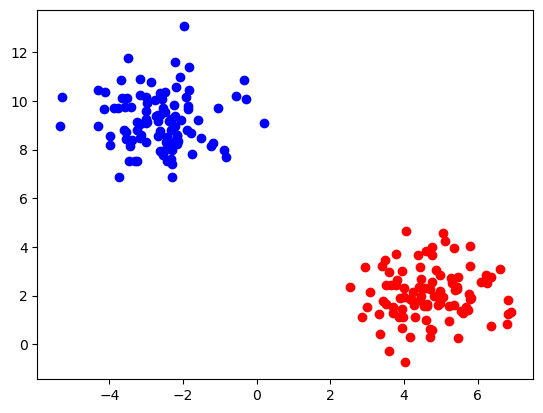

In [66]:
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], label='Cluster 0', color='blue');
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Cluster 0', color='red');

In [78]:
def hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

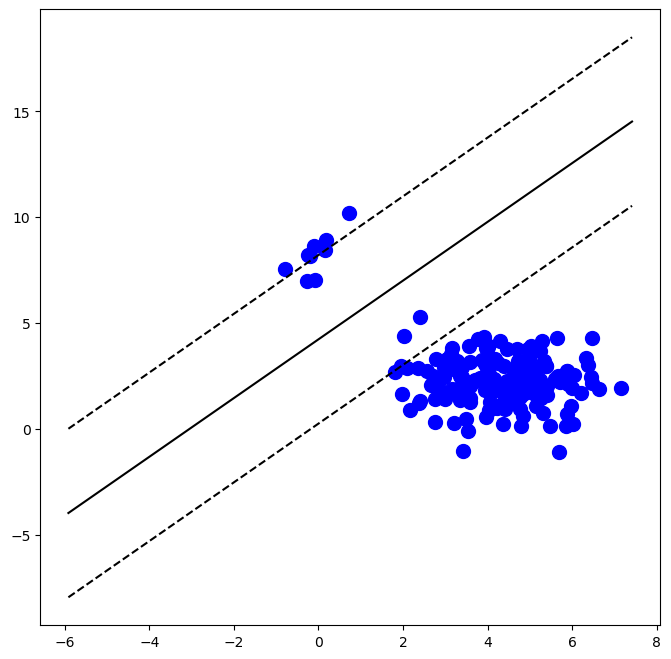

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=100, color='blue', label='Support Vectors',);

x0_1 = np.min(X[:, 0])
x0_2 = np.max(X[: ,0])

plt.plot([x0_1, x0_2], [hyperplane(x0_1, clf.w, clf.b, 0), hyperplane(x0_2, clf.w, clf.b, 0)], 'k-', label='Hyperplane');
plt.plot([x0_1, x0_2], [hyperplane(x0_1, clf.w, clf.b, 1), hyperplane(x0_2, clf.w, clf.b, 1)], 'k--', label='Margin');
plt.plot([x0_1, x0_2], [hyperplane(x0_1, clf.w, clf.b, -1), hyperplane(x0_2, clf.w, clf.b, -1)], 'k--');